## 1. Cities in Sweden - create dataset (*)
a)

In [2]:
import pandas as pd
cities = pd.Series(["Malmö","Stockholm", "Uppsala", "Göteborg"])
populations = pd.Series([347949, 975551, 233839, 583056])

cities_df = pd.DataFrame({"Kommun" : cities, "Population" : populations})
print(cities_df)

      Kommun  Population
0      Malmö      347949
1  Stockholm      975551
2    Uppsala      233839
3   Göteborg      583056


b)

In [3]:
cities_df[cities_df["Kommun"] == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


c)

In [4]:
cities_df_sorted = cities_df.sort_values(by = "Population", ascending= False)
cities_df_sorted

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


d)

In [5]:
cities_df_sorted.head(3)


,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


e)

In [6]:
swedens_population = 10379295
cities_df_sorted["Population (%)"] = (cities_df_sorted["Population"] / swedens_population) * 100
cities_df_sorted

,Kommun,Population,Population (%)
1,Stockholm,975551,9.399010
3,Göteborg,583056,5.617491
0,Malmö,347949,3.352338
2,Uppsala,233839,2.252937


## 2. Cities in Sweden - real dataset

In [7]:
cities_in_sweden = pd.read_excel("Data/komtopp50_2020.xlsx")
cities_in_sweden.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,"Sveriges 50 största kommuner efter folkmängd,",NaN,NaN,NaN,NaN,NaN
2,31 december 2020 jämfört med 31 december 2019,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring
5,2020,2019.0,NaN,2020,2019.0,NaN
6,1,1.0,Stockholm,975551,974073.0,1478
7,2,2.0,Göteborg,583056,579281.0,3775
8,3,3.0,Malmö,347949,344166.0,3783
9,4,4.0,Uppsala,233839,230767.0,3072


In [8]:
cities_in_sweden = cities_in_sweden[6:]
cities_in_sweden.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019" , "Förändring"]
biggest_5 = cities_in_sweden.head()


In [9]:
smallest_5 = cities_in_sweden.tail(5)

In [10]:
folk_2019 = sum(cities_in_sweden["Folkmängd 2019"])
folk_2020 = sum(cities_in_sweden["Folkmängd 2020"])

print(f"Population 2019 : {folk_2019}, 2020 : {folk_2020}")

Population 2019 : 6187016.0, 2020 : 6227447


<AxesSubplot:xlabel='Kommun', ylabel='Folkmängd 2020'>

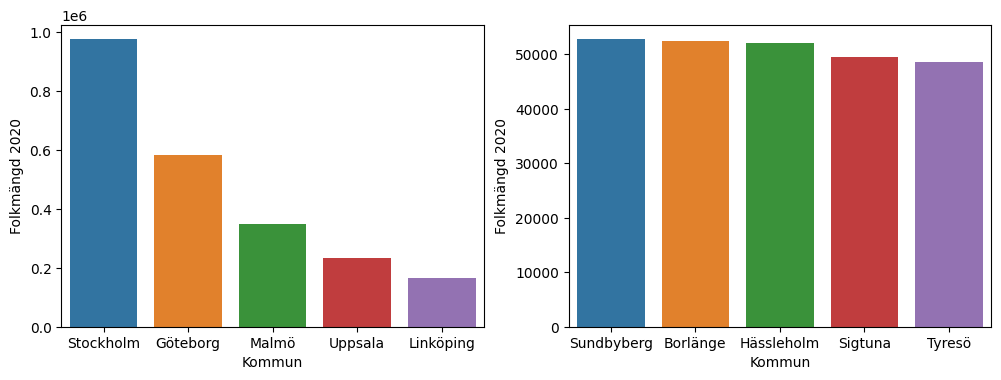

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, dpi = 100, figsize = (12,4))
sns.barplot(data = biggest_5, x="Kommun", y = "Folkmängd 2020", ax = ax[0])
sns.barplot(data = smallest_5, x="Kommun", y = "Folkmängd 2020", ax = ax[1])

In [12]:
cities_men = pd.read_excel("Data/komtopp50_2020.xlsx", sheet_name="Män")[6:]
cities_women = pd.read_excel("Data/komtopp50_2020.xlsx", sheet_name="Kvinnor")[6:]
cities_men.columns = cities_women.columns = cities_in_sweden.columns
cities_men["Kön"] = "Man"
cities_women["Kön"] = "Kvinna"


cities_men.head(10)
cities_women.head(10)


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
6,84,85.0,Ale,15612,15348.0,1.720094,Kvinna
7,64,64.0,Alingsås,20900,20774.0,0.606527,Kvinna
8,123,123.0,Alvesta,9857,9795.0,0.632976,Kvinna
9,255,255.0,Aneby,3318,3350.0,-0.955224,Kvinna
10,165,164.0,Arboga,6945,6973.0,-0.401549,Kvinna
11,287,287.0,Arjeplog,1292,1327.0,-2.637528,Kvinna
12,260,260.0,Arvidsjaur,2977,3038.0,-2.0079,Kvinna
13,103,101.0,Arvika,12895,12981.0,-0.662507,Kvinna
14,197,199.0,Askersund,5604,5589.0,0.268384,Kvinna
15,112,112.0,Avesta,11391,11444.0,-0.463125,Kvinna


In [13]:
cities_men["Rang 2019"] = cities_men["Rang 2019"].astype(int)
cities_women["Rang 2019"] = cities_women["Rang 2019"].astype(int)
cities_men.head(10)


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
6,81,83,Ale,16256,16054.0,1.258253,Man
7,64,64,Alingsås,20702,20646.0,0.271239,Man
8,122,123,Alvesta,10367,10339.0,0.270819,Man
9,255,255,Aneby,3503,3498.0,0.142939,Man
10,169,168,Arboga,7094,7114.0,-0.281136,Man
11,287,286,Arjeplog,1426,1458.0,-2.194787,Man
12,262,262,Arvidsjaur,3168,3182.0,-0.439975,Man
13,103,103,Arvika,13037,13064.0,-0.206675,Man
14,197,199,Askersund,5867,5788.0,1.364893,Man
15,113,113,Avesta,11676,11734.0,-0.49429,Man


In [14]:
#cities_men_and_women = cities_men.merge(cities_women, how="outer")
cities_men_and_women = cities_men.merge(cities_women, how = "outer")
cities_men_and_women

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81.0,83,Ale,16256.0,16054.0,1.258253,Man
1,64.0,64,Alingsås,20702.0,20646.0,0.271239,Man
2,122.0,123,Alvesta,10367.0,10339.0,0.270819,Man
3,255.0,255,Aneby,3503.0,3498.0,0.142939,Man
4,169.0,168,Arboga,7094.0,7114.0,-0.281136,Man
...,...,...,...,...,...,...,...
575,55,57,Österåker,22997,22442.0,2.473042,Kvinna
576,117,118,Östhammar,10846,10803.0,0.398038,Kvinna
577,160,159,Östra Göinge,7270,7262.0,0.110162,Kvinna
578,284,284,Överkalix,1559,1578.0,-1.204056,Kvinna


In [15]:
cities_men_and_women = cities_men_and_women.loc[:, ~cities_men_and_women.columns.isin(["Rang 2020", "Rang 2019"])]
cities_men_and_women

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,16256.0,16054.0,1.258253,Man
1,Alingsås,20702.0,20646.0,0.271239,Man
2,Alvesta,10367.0,10339.0,0.270819,Man
3,Aneby,3503.0,3498.0,0.142939,Man
4,Arboga,7094.0,7114.0,-0.281136,Man
...,...,...,...,...,...
575,Österåker,22997,22442.0,2.473042,Kvinna
576,Östhammar,10846,10803.0,0.398038,Kvinna
577,Östra Göinge,7270,7262.0,0.110162,Kvinna
578,Överkalix,1559,1578.0,-1.204056,Kvinna


In [25]:
cities_men_and_women = cities_men_and_women.sort_values(by = "Kommun")
cities_men_and_women["Förändring"] = cities_men_and_women["Förändring"].replace(['.', ','], "0.00")
cities_men_and_women




,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,16256.0,16054.0,1.258253,Man
290,Ale,15612,15348.0,1.720094,Kvinna
1,Alingsås,20702.0,20646.0,0.271239,Man
291,Alingsås,20900,20774.0,0.606527,Kvinna
2,Alvesta,10367.0,10339.0,0.270819,Man
...,...,...,...,...,...
287,Östra Göinge,7747.0,7745.0,0.025823,Man
578,Överkalix,1559,1578.0,-1.204056,Kvinna
288,Överkalix,1730.0,1737.0,-0.402994,Man
289,Övertorneå,2190.0,2234.0,-1.969561,Man


In [31]:
grouped_cities_men_and_women = cities_men_and_women.groupby('Kommun').agg({"Folkmängd 2020": 'sum' , "Folkmängd 2019" : 'sum'})
grouped_cities_men_and_women = pd.DataFrame(grouped_cities_men_and_women)
grouped_cities_men_and_women["Total Förändring"] = ((grouped_cities_men_and_women["Folkmängd 2020"] - grouped_cities_men_and_women["Folkmängd 2019"]) / grouped_cities_men_and_women["Folkmängd 2019"]) *100
grouped_cities_men_and_women

,Folkmängd 2020,Folkmängd 2019,Total Förändring
Kommun,,,
Ale,31868.0,31402.0,1.483982
Alingsås,41602.0,41420.0,0.439401
Alvesta,20224.0,20134.0,0.447005
Aneby,6821.0,6848.0,-0.394276
Arboga,14039.0,14087.0,-0.340740
...,...,...,...
Österåker,46644.0,45574.0,2.347830
Östhammar,22251.0,22250.0,0.004494
Östra Göinge,15017.0,15007.0,0.066636


In [32]:
grouped_cities_men_and_women_top = grouped_cities_men_and_women.sort_values(by= "Folkmängd 2020", ascending=False)
grouped_cities_men_and_women_top

,Folkmängd 2020,Folkmängd 2019,Total Förändring
Kommun,,,
Stockholm,975551.0,974073.0,0.151734
Göteborg,583056.0,579281.0,0.651670
Malmö,347949.0,344166.0,1.099179
Uppsala,233839.0,230767.0,1.331213
Linköping,164616.0,163051.0,0.959822
...,...,...,...
Åsele,2805.0,2794.0,0.393701
Arjeplog,2718.0,2785.0,-2.405745
Dorotea,2498.0,2551.0,-2.077617


KeyError: 'Kommun'